# Designing of Quantum circuit for Simplified AES

Author: Sukhsagar Dubey

Advisor: Utasav Banarjee

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister ,ClassicalRegister
from qiskit.visualization import plot_histogram

## Encryption Block diagram
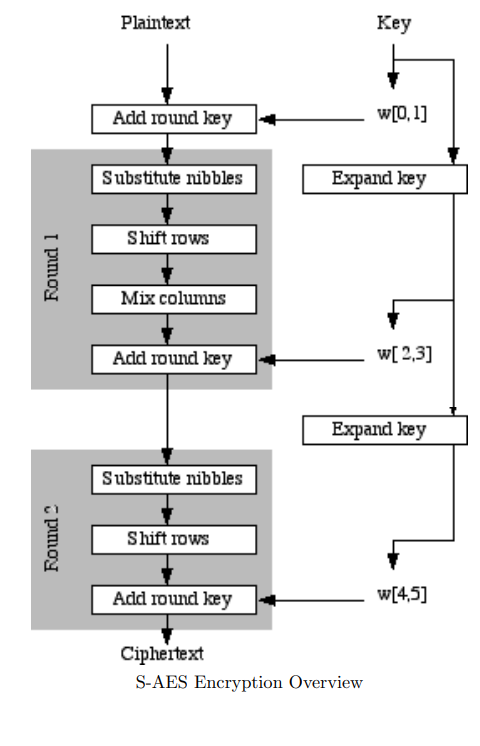

## S-Box (Nibble Substitution)
  
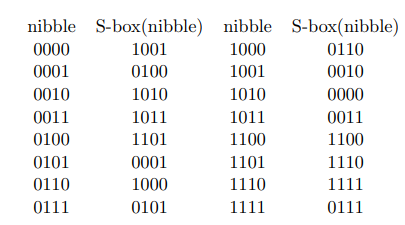

look up table : 94abd1856203cef7

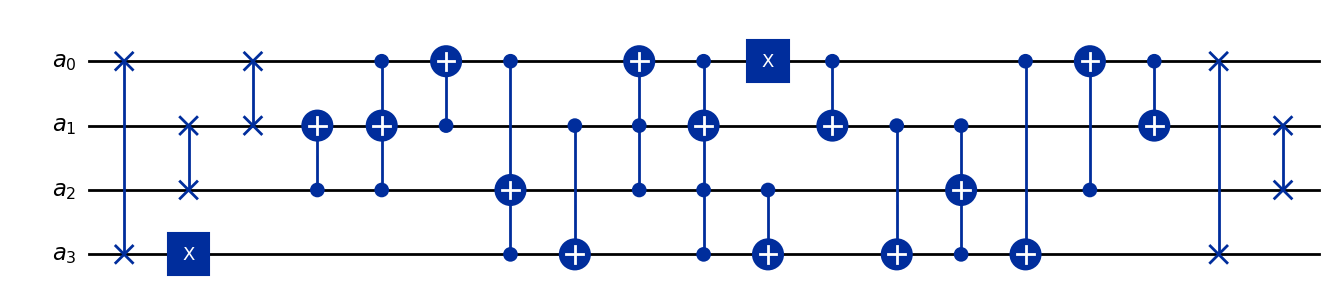

In [2]:
# Quantum circuit for 
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
qc.swap(0,3)
qc.swap(1,2)
qc.swap(0,1)
qc.cx(2,1)
qc.ccx(2,0,1)
qc.cx(1,0)
qc.x(3)
qc.ccx(3,0,2)
qc.cx(1,3)
qc.ccx(2,1,0)
qc.mcx([0,3,2],1)
qc.x(0)
qc.cx(2,3)
qc.cx(0,1)
qc.cx(1,3)
qc.ccx(3,1,2)
qc.cx([0,2,0],[3,0,1])
qc.swap(0,3)
qc.swap(1,2)
MI=qc.to_gate(label='MI')  
MI_dag=qc.inverse().to_gate(label='MI_dag')
qc.draw('mpl')

## MixColumns


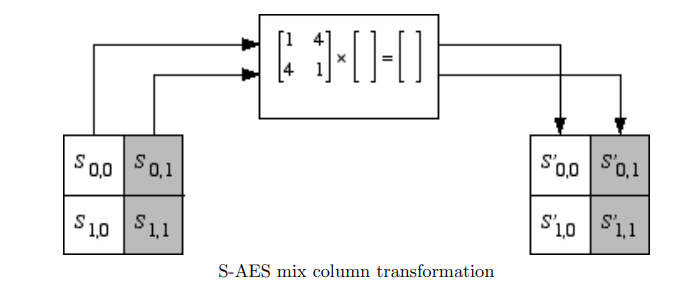

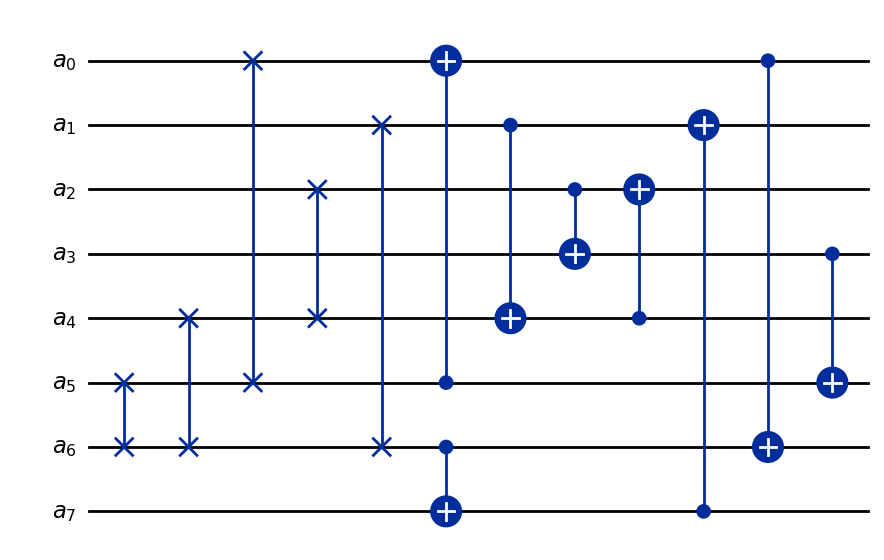

In [3]:
a=QuantumRegister(8,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Mixcolumn
qc.swap(5,6)
qc.swap(4,6)
qc.swap(2,4)
qc.swap(1,6)
qc.swap(0,5)
qc.cx([1,5,2,4,6,7,0,3],[4,0,3,2,7,1,6,5])
mc=qc.to_gate(label='MC')  
qc.draw('mpl')

## Key expansion 

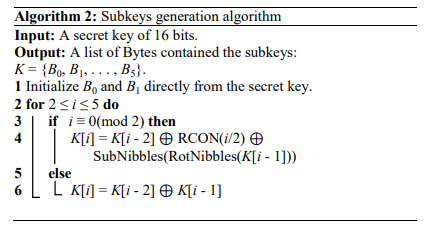

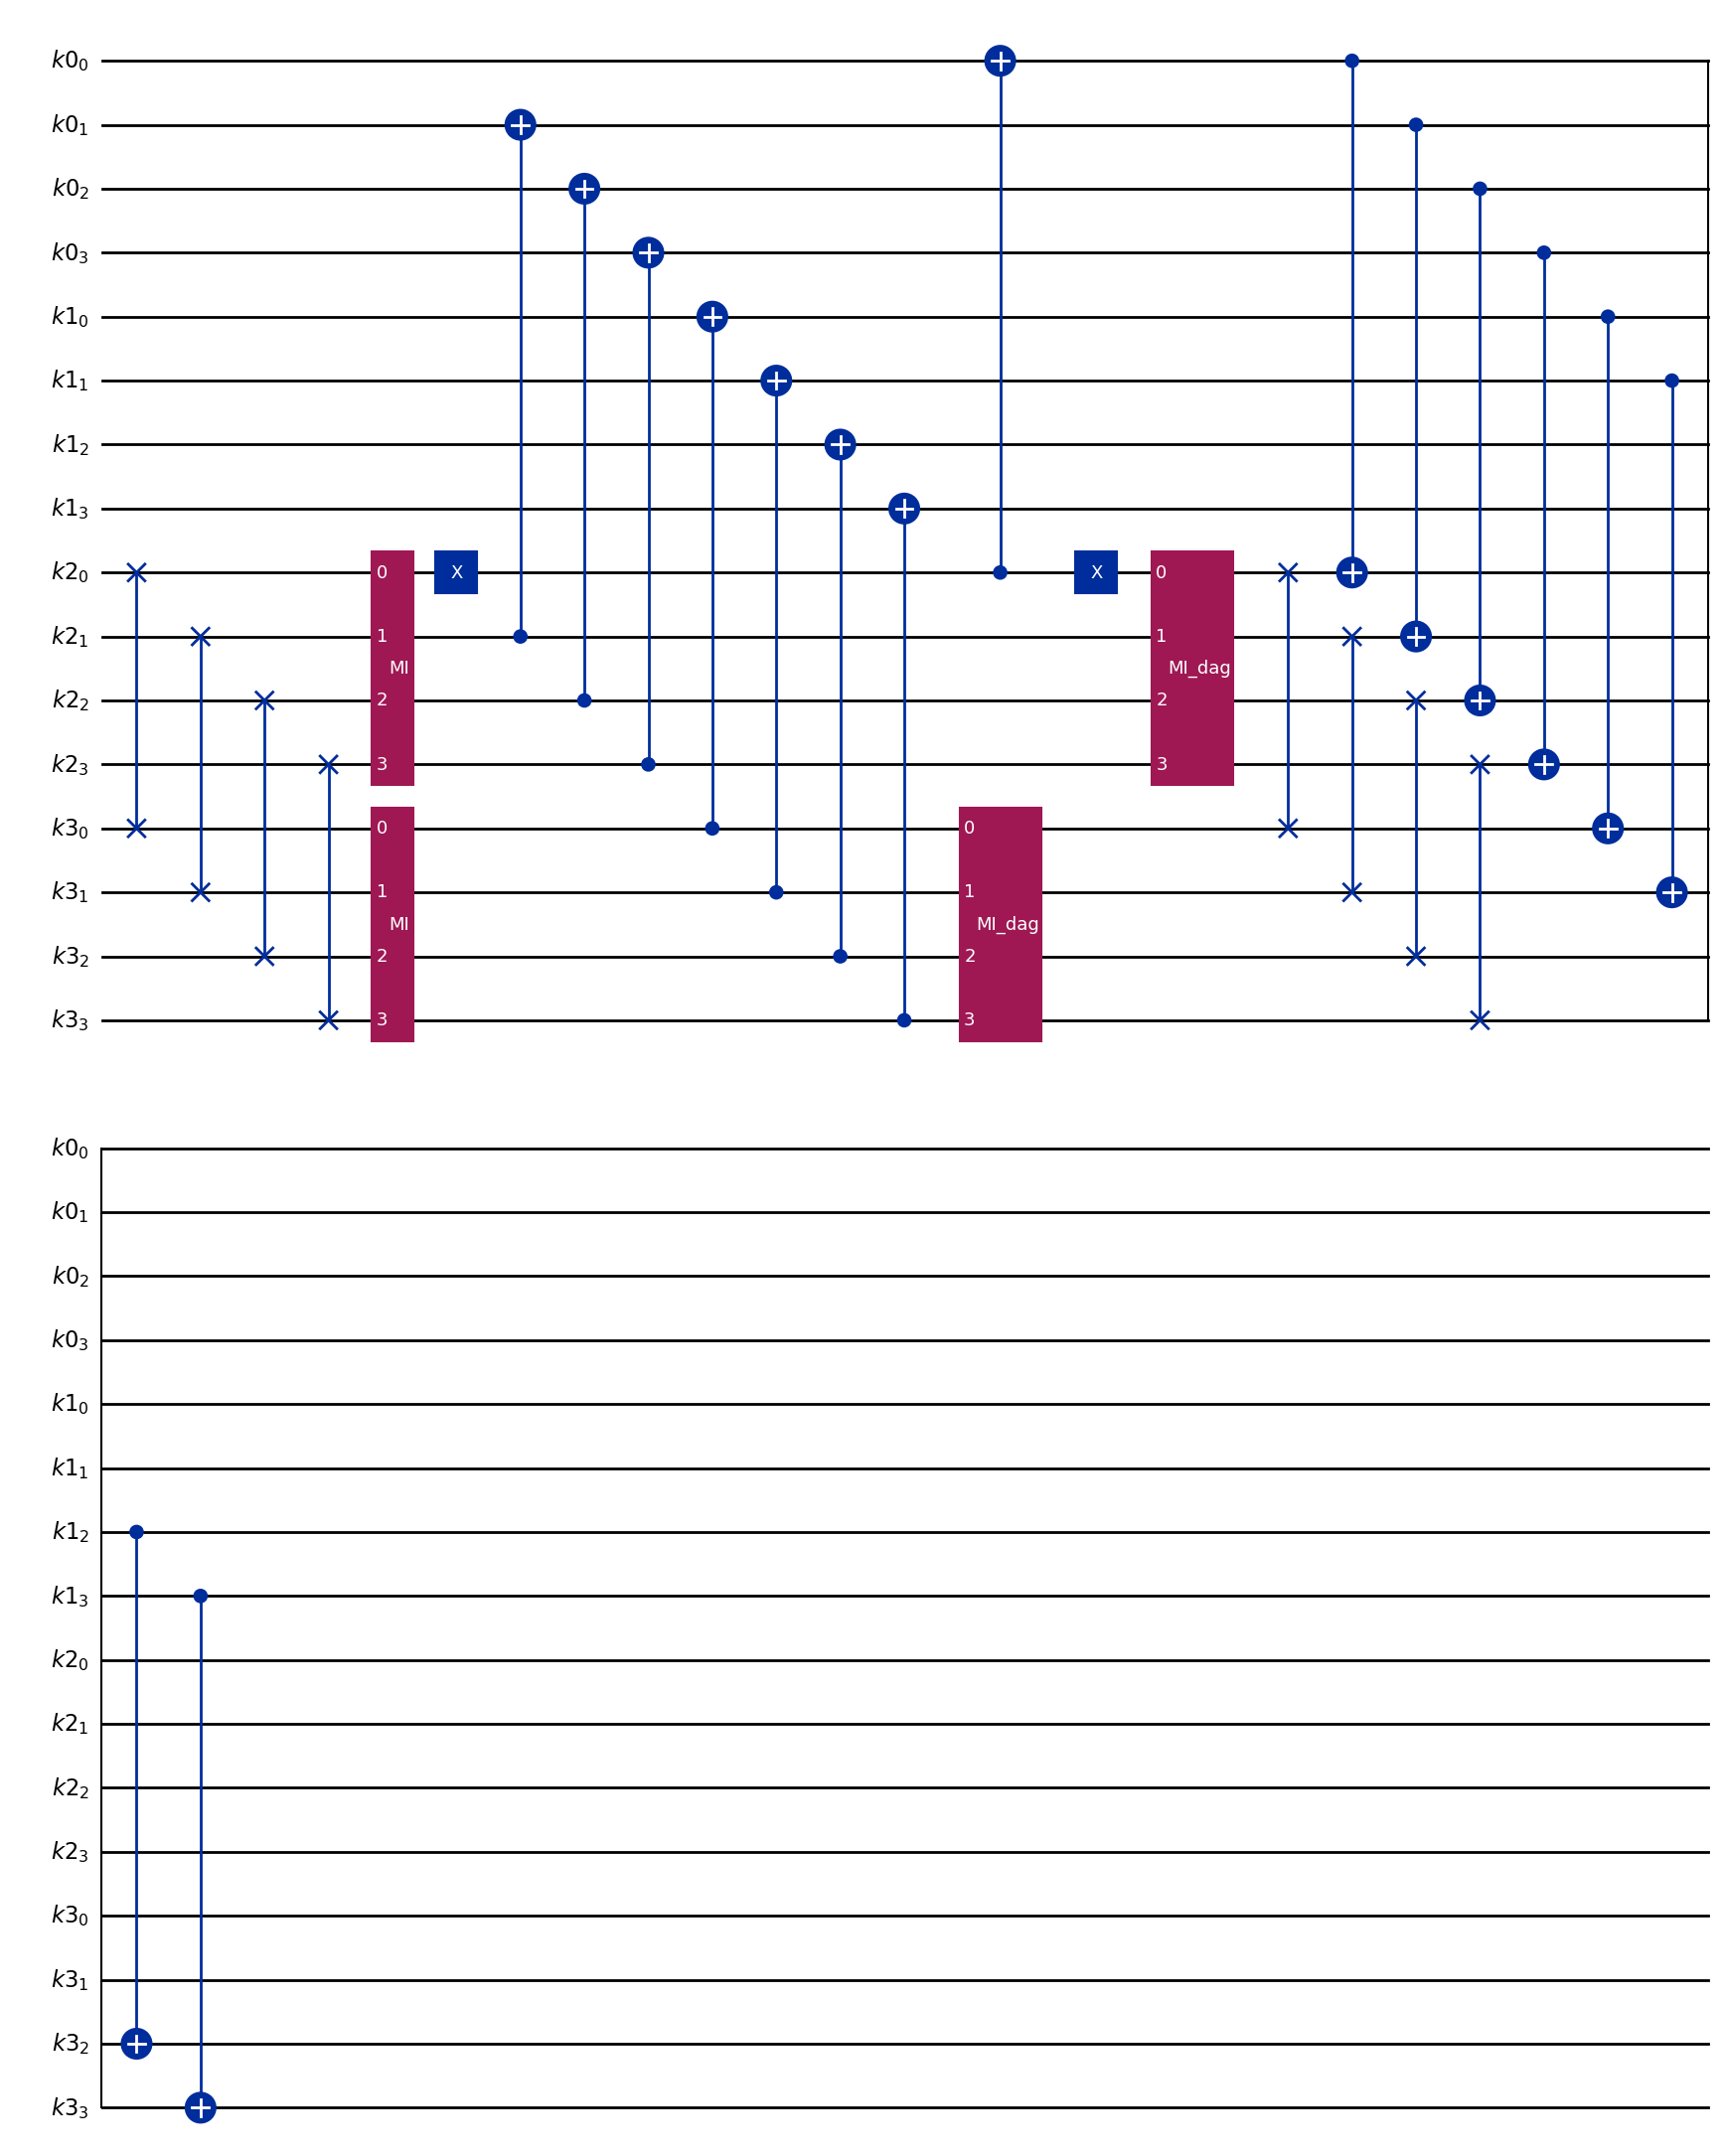

In [4]:
k0=QuantumRegister(4,name='k0')#Input register
k1=QuantumRegister(4,name='k1')#Input register
k2=QuantumRegister(4,name='k2')#Input register
k3=QuantumRegister(4,name='k3')#Input register

qc=QuantumCircuit(k0,k1,k2,k3)
# w1=[k2,k3]
qc.swap(k2[:],k3[:])
qc.append(MI,k2[:])
qc.append(MI,k3[:])
qc.x(k2[0])
qc.cx(k2[:]+k3[:],k0[:]+k1[:])

#--------------Reverse----------
qc.x(k2[0])
qc.append(MI_dag,k2[:])
qc.append(MI_dag,k3[:])
qc.swap(k2[:],k3[:])
#--------------------

qc.cx(k0[:]+k1[:],k2[:]+k3[:])
ke1=qc.to_gate(label='ke1')
qc.draw('mpl')

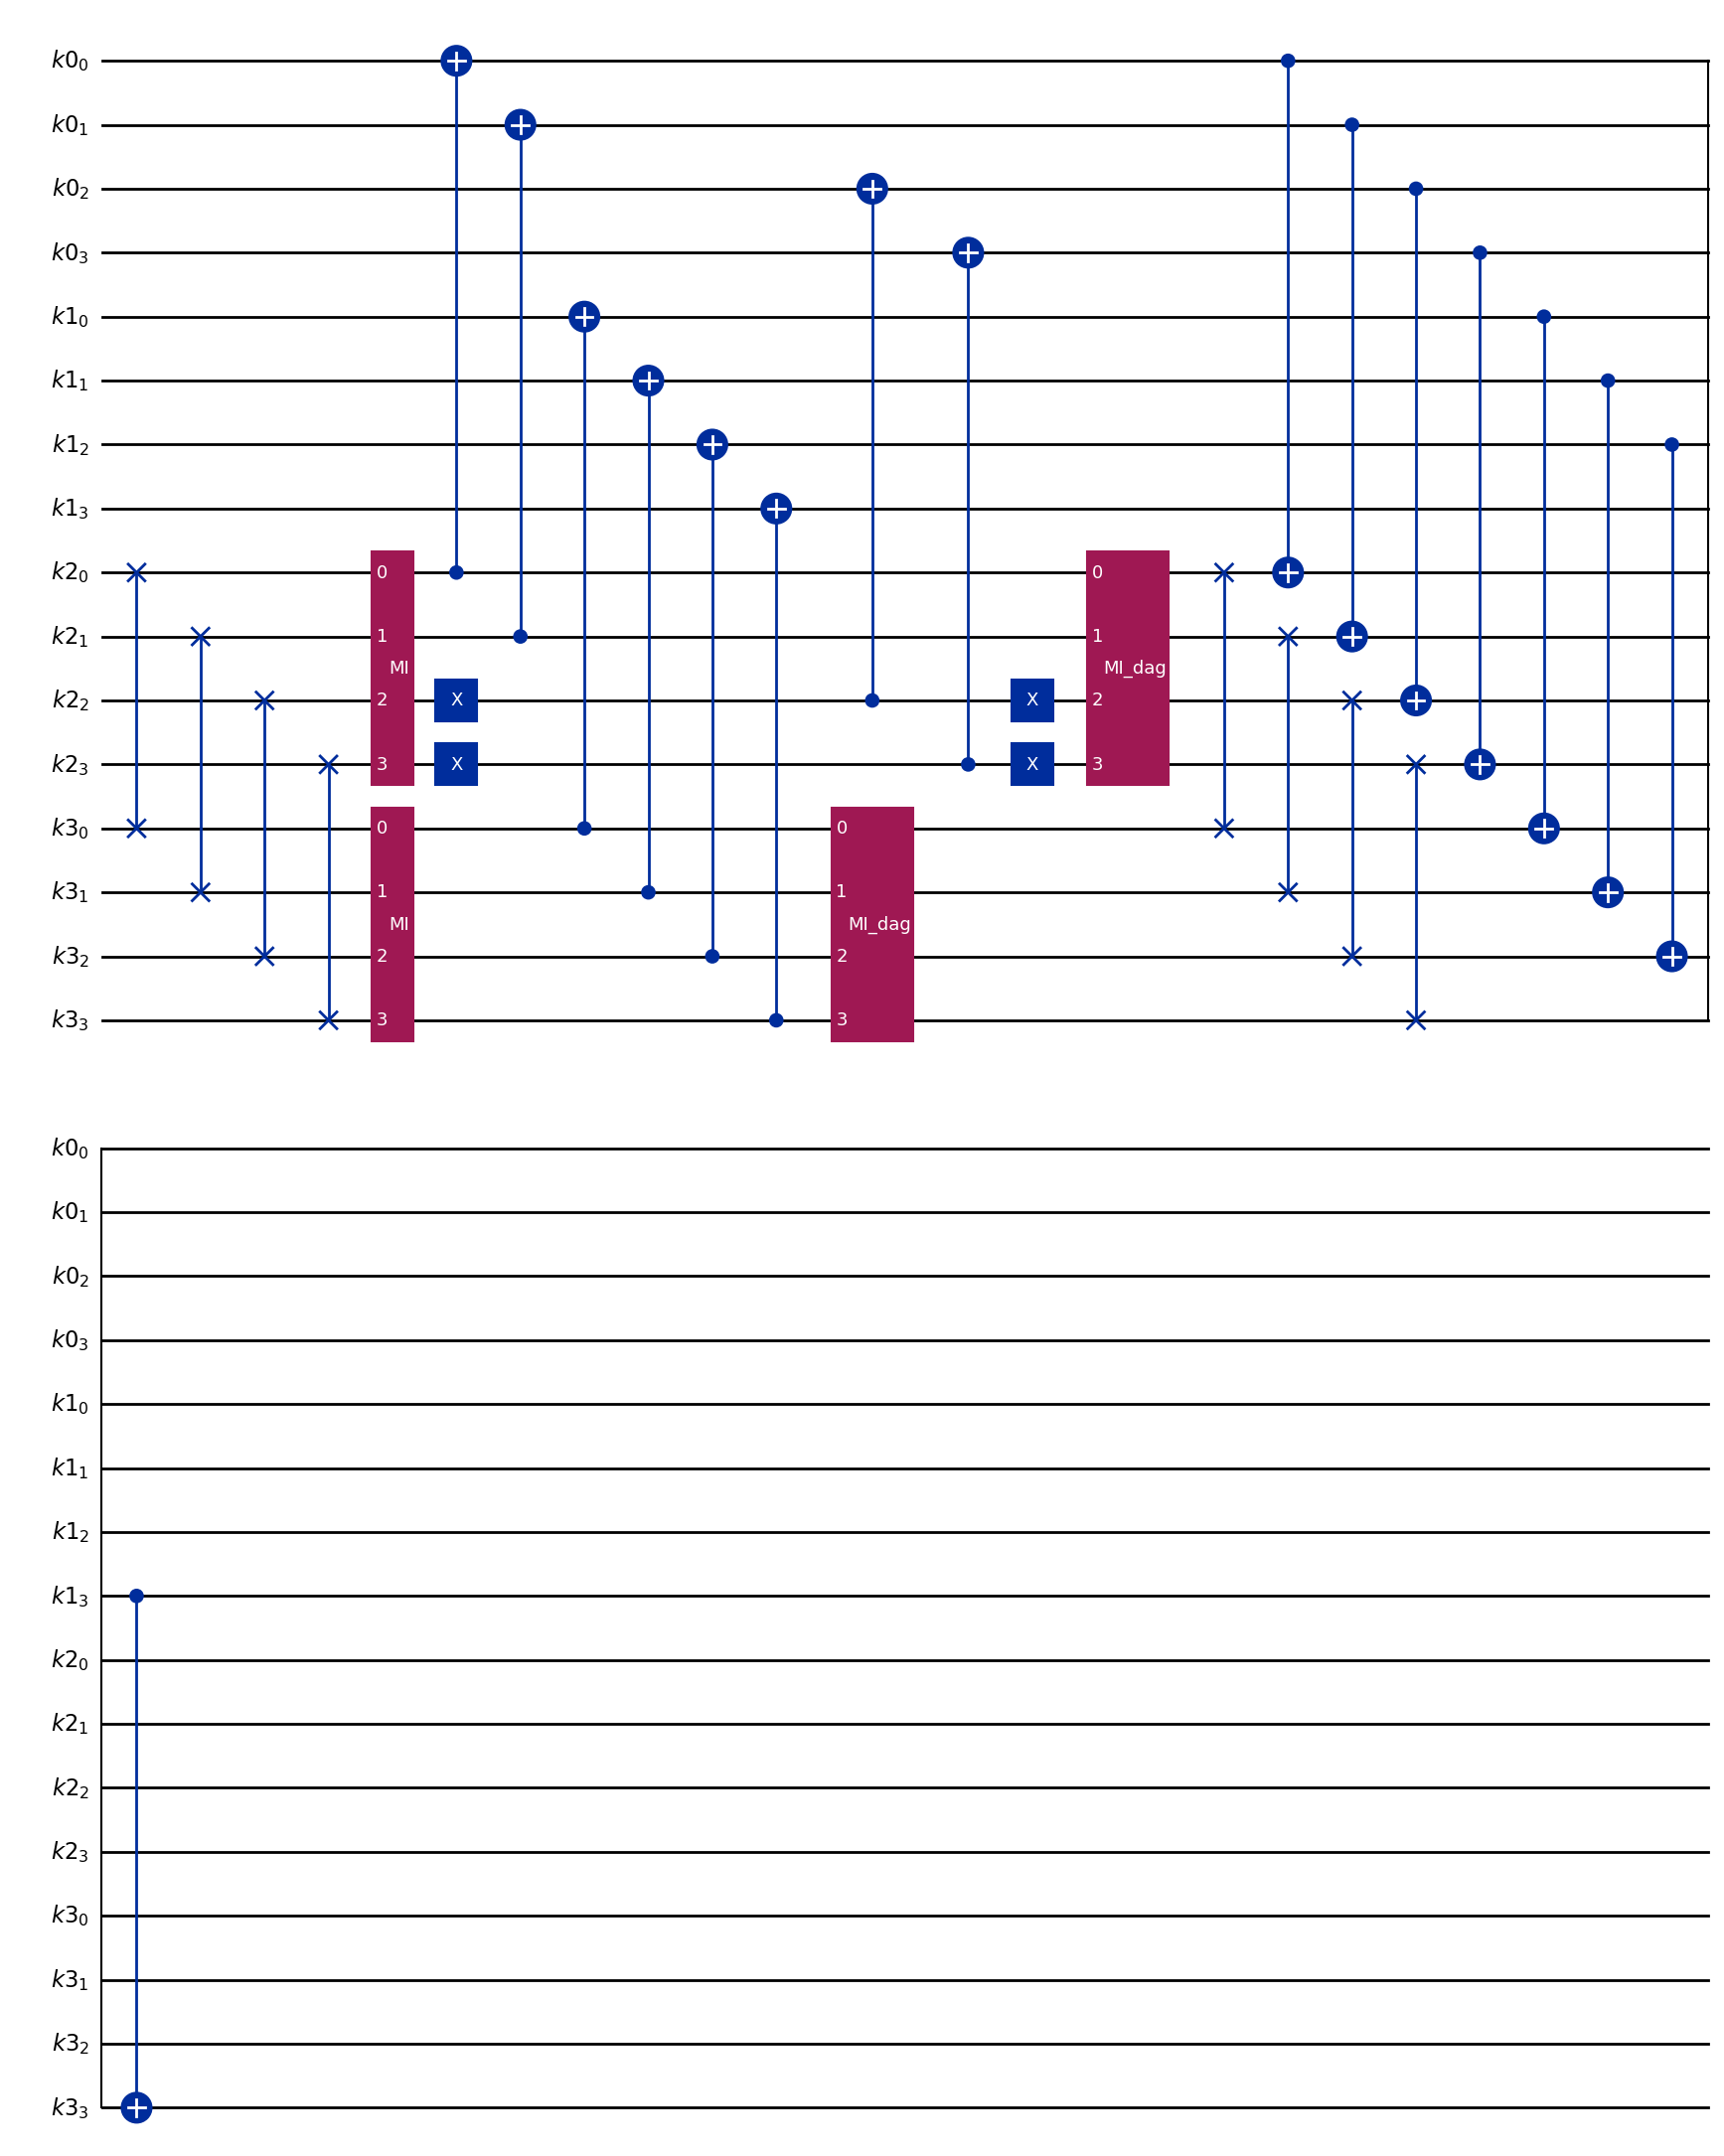

In [5]:
k0=QuantumRegister(4,name='k0')#Input register
k1=QuantumRegister(4,name='k1')#Input register
k2=QuantumRegister(4,name='k2')#Input register
k3=QuantumRegister(4,name='k3')#Input register

qc=QuantumCircuit(k0,k1,k2,k3)
# w1=[k2,k3]
qc.swap(k2[:],k3[:])
qc.append(MI,k2[:])
qc.append(MI,k3[:])
qc.x(k2[2:4])
qc.cx(k2[:]+k3[:],k0[:]+k1[:])

#--------------Reverse----------
qc.x(k2[2:4])
qc.append(MI_dag,k2[:])
qc.append(MI_dag,k3[:])
qc.swap(k2[:],k3[:])
#--------------------

qc.cx(k0[:]+k1[:],k2[:]+k3[:])
ke2=qc.to_gate(label='ke2')
qc.draw('mpl')

## Quantum circuit for  Encryption 

In [6]:
k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
cl=ClassicalRegister(16)
qc=QuantumCircuit(k,m)
#--------------Encode input-----
'''
inp='0110111101101011' 
key='1010011100111011'
for i in range(len(inp)):
    if inp[i]=='1':
        qc.x(16+i)   
        
for i in range(len(key)):
    if key[i]=='1':
        qc.x(i)    '''    
#qc.barrier()        

qc.cx(k[:],m[:])  #Add round key 

#-------Round 1----------
qc.append(MI,m[0:4])
qc.append(MI,m[4:8])
qc.append(MI,m[8:12])
qc.append(MI,m[12:16])
qc.swap(m[4:8],m[12:16])
qc.append(mc,m[0:4]+m[4:8])
qc.append(mc,m[8:12]+m[12:16])


qc.append(ke1,k[:])

qc.cx(k[:],m[:])  #Add round key 


#---------Round two-------
qc.append(MI,m[0:4])
qc.append(MI,m[4:8])
qc.append(MI,m[8:12])
qc.append(MI,m[12:16])
qc.swap(m[4:8],m[12:16]) #shift row

qc.append(ke2,k[:])

qc.cx(k[:],m[:])  #Add round key 


Enc=qc.to_gate(label='Enc')     #Quantum circuit for Encoding
Dec=qc.inverse().to_gate(label='Dec') #Quantum circuit for Decoding 
#qc.measure(m,cl[::-1])
#qc.draw('mpl')

In [7]:
# Simulate Encryption and decryption circuit 
k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
cl=ClassicalRegister(16)
qc=QuantumCircuit(k,m,cl)

inp='0110111101101011' 
key='1010011100111011'
res='0000 0111 0011 1000'
for i in range(len(inp)):
    if inp[i]=='1':
        qc.x(16+i)   
        
for i in range(len(key)):
    if key[i]=='1':
        qc.x(i) 
        
qc.append(Enc,k[:]+m[:])
#qc.append(Dec,k[:]+m[:])
qc.measure(m,cl[::-1])


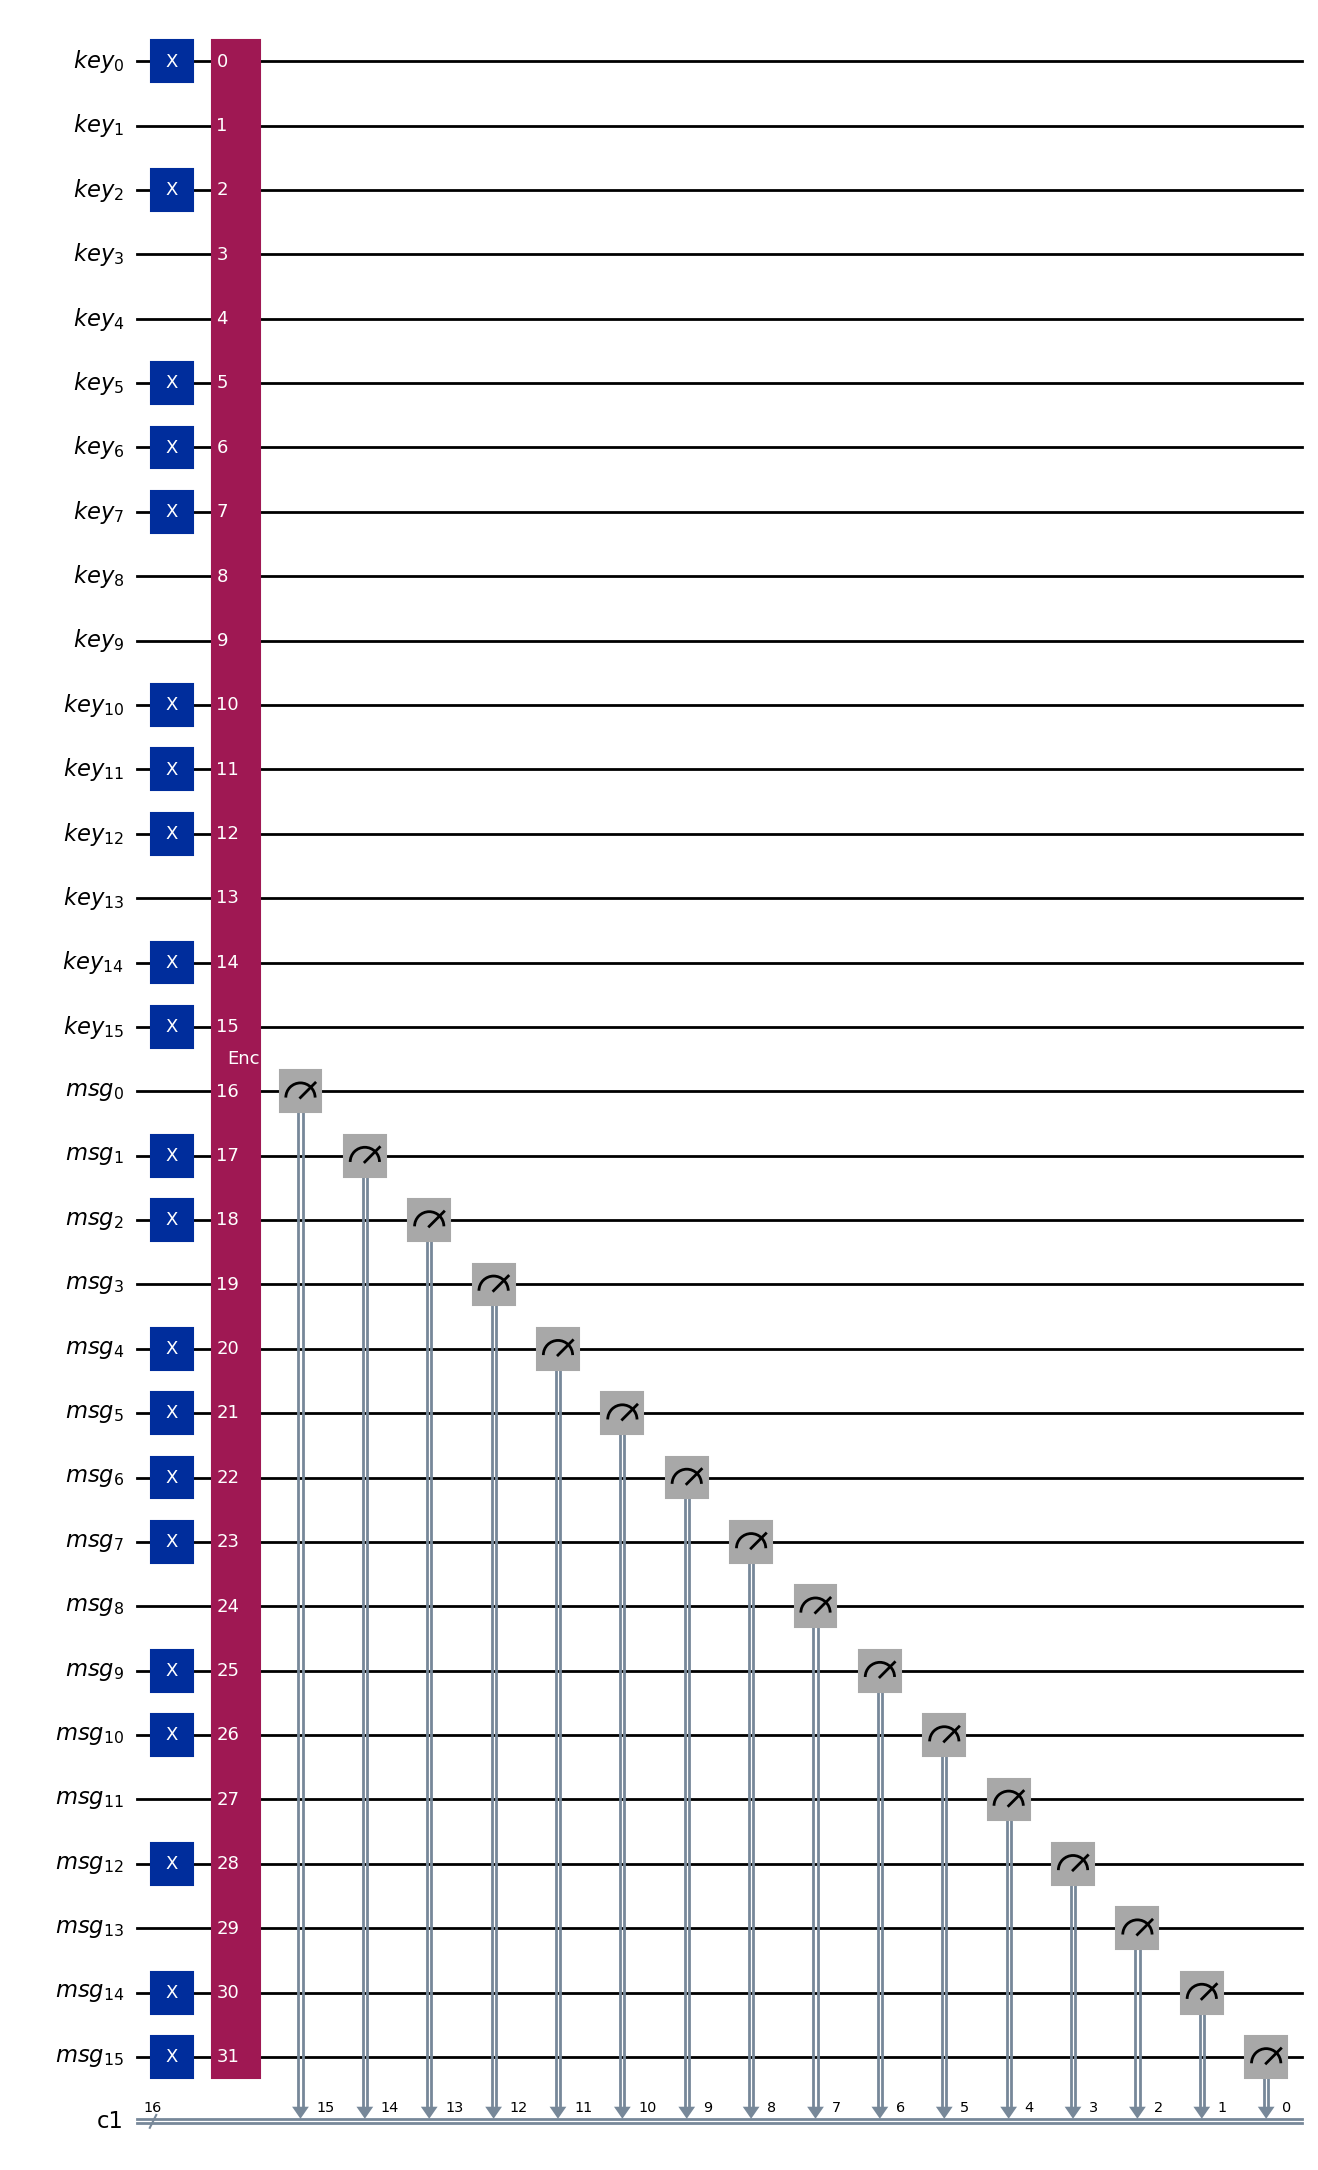

In [8]:
qc.draw('mpl')

In [9]:
import numpy as np
from qiskit import transpile
from qiskit_aer import AerSimulator

# Select the AerSimulator from the Aer provider
simulator = AerSimulator(method='matrix_product_state')

# Run and get counts, using the matrix_product_state method
tcirc = transpile(qc, simulator)
result = simulator.run(tcirc).result()
counts = result.get_counts(0)
print(counts)
plain_txt='0110111101101011' 
cipher_txt='0000011100111000'

{'0000011100111000': 1024}


In [10]:
#Quantum circuit for Grover attack 

k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
anc=QuantumRegister(1,name='anc')#Input register
cl=ClassicalRegister(16)
ckt=QuantumCircuit(k,m,anc,cl)


inp='0110111101101011' 
#key='1010011100111011'
res='0000011100111000'

ckt.x(anc)
ckt.h(anc)         
ckt.h(k) 

#Encoding input 
for i in range(len(inp)):
    if inp[i]=='1':
        ckt.x(16+i)
        
for _ in range(256):    
    ckt.append(Enc,k[:]+m[:])
    
    for i in range(len(res)):
        if res[i]=='0':
            ckt.x(16+i)
            
    ckt.mcx(m[:],anc)  
    
    for i in range(len(res)):
        if res[i]=='0':
            ckt.x(16+i)
            
    ckt.append(Dec,k[:]+m[:])
    
    # Diffusion Operator 
    ckt.h(k)
    ckt.x(k)
    ckt.h(anc) 
    ckt.mcx(k[:],anc)
    ckt.h(anc)
    ckt.x(k)
    ckt.h(k)
    
ckt.measure(k,cl[::-1])

#ckt.draw()

In [11]:
ckt.draw()

┌───┐┌───────┐               ┌───────┐┌───┐┌───┐     ┌───┐┌───┐»
 key_0: ┤ H ├┤0      ├───────────────┤0      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_1: ┤ H ├┤1      ├───────────────┤1      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_2: ┤ H ├┤2      ├───────────────┤2      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_3: ┤ H ├┤3      ├───────────────┤3      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_4: ┤ H ├┤4      ├───────────────┤4      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_5: ┤ H ├┤5      ├───────────────┤5      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_6: ┤ H ├┤6      ├───────────────┤6      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_7: ┤ H ├┤7      ├───────────────┤7      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_8: ┤ H ├┤8      ├───────────────┤8      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
 key_9: ┤ H ├┤9      ├───────────────┤9      ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_10: ┤ H ├┤10     ├───────────────┤10     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_11: ┤ H ├┤11     ├───────────────┤11     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_12: ┤ H ├┤12     ├───────────────┤12     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_13: ┤ H ├┤13     ├───────────────┤13     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_14: ┤ H ├┤14     ├───────────────┤14     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        ├───┤│       │               │       │├───┤├───┤  │  ├───┤├───┤»
key_15: ┤ H ├┤15     ├───────────────┤15     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├»
        └───┘│   Enc │┌───┐     ┌───┐│   Dec │└───┘└───┘  │  └───┘└───┘»
 msg_0: ─────┤16     ├┤ X ├──■──┤ X ├┤16     ├────────────┼────────────»
        ┌───┐│       │├───┤  │  ├───┤│       │            │            »
 msg_1: ┤ X ├┤17     ├┤ X ├──■──┤ X ├┤17     ├────────────┼────────────»
        ├───┤│       │├───┤  │  ├───┤│       │            │            »
 msg_2: ┤ X ├┤18     ├┤ X ├──■──┤ X ├┤18     ├────────────┼────────────»
        └───┘│       │├───┤  │  ├───┤│       │            │            »
 msg_3: ─────┤19     ├┤ X ├──■──┤ X ├┤19     ├────────────┼────────────»
        ┌───┐│       │├───┤  │  ├───┤│       │            │            »
 msg_4: ┤ X ├┤20     ├┤ X ├──■──┤ X ├┤20     ├────────────┼────────────»
        ├───┤│       │└───┘  │  └───┘│       │            │            »
 msg_5: ┤ X ├┤21     ├───────■───────┤21     ├────────────┼────────────»
        ├───┤│       │       │       │       │            │            »
 msg_6: ┤ X ├┤22     ├───────■───────┤22     ├────────────┼────────────»
        ├───┤│       │       │       │       │            │            »
 msg_7: ┤ X ├┤23     ├───────■───────┤23     ├────────────┼────────────»
        └───┘│       │┌───┐  │  ┌───┐│       │            │            »
 msg_8: ─────┤24     ├┤ X ├──■──┤ X ├┤24     ├────────────┼────────────»
        ┌───┐│       │├───┤  │  ├───┤│       │            │            »
 msg_9: ┤ X ├┤25     ├┤ X ├──■──┤ X ├┤25     ├────────────┼────────────»
        ├───┤│       │└───┘  │  └───┘│       │            │            »
msg_10: ┤ X ├┤26     ├───────■───────┤26     ├────────────┼────────────»
        └───┘│       │       │       │       │            │       

In [ ]:
# Simulating attack 
# Run and get counts, using the matrix_product_state method
tcirc = transpile(ckt, simulator)
result = simulator.run(tcirc).result()
counts = result.get_counts(0)
print(counts)

# References 
 1. Quantum Grover Attack on the Simplified-AES [https://dl.acm.org/doi/pdf/10.1145/3185089.3185122]
 2. Simplified AES Example by Steven Gordon   [https://sandilands.info/sgordon/teaching/reports/simplified-aes-example.pdf]
